# Fake Job Postings

## 0. Introduction

This notebook details the creation of a classification model that aims to predict whether a job posting is real or fraudulent using natural language processing. The data can also be used to identify key traits of job descriptions that are fraudulent in nature.

#### Dataset

The dataset was provided by Shivam Bansal via Kaggle:

[Real / Fake Job Posting Prediction](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction)

_Description:_<br>
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

#### Notebook Contents

The notebook will be split into the following sections:
>1. Importing and Examination
>2. Data Cleaning
>3. Exploratory Data Analysis
>4. Feature Engineering
>5. Multinomial Naive Bayes Model
>6. Long Short-Term Memory Model
>7. Conclusion

## 1. Importing and Examination

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
all_data = pd.read_csv('fake_job_postings.csv')

In [3]:
all_data.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


The dataset contains columns that will not help to identify whether or not a job posting is fraudulent, such as _job_id_ that is unique for every instance.

For the purposes of this study, only the main text columns (_title, company_profile, description, requirements, benefits_) and label (_fraudulent_) will be retained as these are the columns that will contain the most useful information to classify the job postings. The other columsn will be removed from the dataset. 

In [4]:
df = all_data[['title', 'company_profile', 'description', 'requirements', 'benefits', 'fraudulent']]
df.head(10)

,title,company_profile,description,requirements,benefits,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0
5,Accounting Clerk,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0
6,Head of Content (m/f),"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0
7,Lead Guest Service Specialist,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0
8,HP BSM SME,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0
9,Customer Service Associate - Part Time,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            17880 non-null  object
 1   company_profile  14572 non-null  object
 2   description      17879 non-null  object
 3   requirements     15185 non-null  object
 4   benefits         10670 non-null  object
 5   fraudulent       17880 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 838.2+ KB


In [6]:
df.isnull().sum()

title                 0
company_profile    3308
description           1
requirements       2695
benefits           7210
fraudulent            0
dtype: int64

In [7]:
df[df['description'].isnull()]

,title,company_profile,description,requirements,benefits,fraudulent
17513,Office Manager,NaN,NaN,NaN,NaN,1


Although _company_profile, requirements_ and _benefits_ contain a significant number of null values, it is likely that the these are written in _description_ instead, or a company does not necessarily have to include a company profile or list the benefits in the job listing. Therefore, these entries will be kept in and only the one entry containing no text at all will be dropped.

In [8]:
df.dropna(subset=['description'], inplace=True)
df.isnull().sum()

title                 0
company_profile    3307
description           0
requirements       2694
benefits           7209
fraudulent            0
dtype: int64

## 2. Data Cleaning

In this stage of the analysis, the text will be converted into a form that can be understood by machine learning and deep learning algorithms and any invalid words/ characters will be removed.

In [9]:
# Replacing NaN with whitespace
df.fillna(value=' ', inplace=True)
df.isnull().sum()

title              0
company_profile    0
description        0
requirements       0
benefits           0
fraudulent         0
dtype: int64

In [10]:
# Concatenating text columns
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df['text'] = df[text_columns].agg(' '.join, axis=1)
df.drop(columns=text_columns, inplace=True)

In [11]:
df.head()

,fraudulent,text
0,0,"Marketing Intern We're Food52, and we've creat..."
1,0,Customer Service - Cloud Video Production 90 S...
2,0,Commissioning Machinery Assistant (CMA) Valor ...
3,0,Account Executive - Washington DC Our passion ...
4,0,Bill Review Manager SpotSource Solutions LLC i...


In [12]:
import re

In [13]:
df['text'].str.findall(' [a-z]+[A-Z][a-z]+')

0        [ systemsResearching,  inquiriesSupporting,  n...
1        [ skillsOnline,  toolsOrganised,  detailMotiva...
2                                                       []
3        [ organizationClearly,  platformDevelop,  grow...
4        [ operationsResponsible,  cultureDevelops,  ca...
                               ...                        
17875    [ forVend,  iPads,  breakfastHave,  yearsWill,...
17876    [ eCommerce,  eCommerce,  eCommerce,  eCommerc...
17877    [ complexityActive,  changesDevelopment,  repo...
17878                                                   []
17879    [ forVend,  iPads,  jQuery,  programmingYou,  ...
Name: text, Length: 17879, dtype: object

Due to the method of scraping the data, certain sentences have been joined together without a space between two words as shown above, identified with an uppercase letter following a lowercase letter in the middle of a word. A space will be added between them so that they are separated. Although certain words have been picked up by the regular expression but are not incorrectly joined (e.g. iPads, eCommerce), adding a space between them will not affect the accuracy of the model because the order in which words appear will be accounted for.

In [14]:
# Adding space between words
def add_space(text):
    text = re.sub('( [a-z]+)([A-Z][a-z]+)', r'\1 \2', text)
    return text

df['text'] = df['text'].apply(lambda x: add_space(x))

In [15]:
# Converting all words to lowercase
df['text'] = df['text'].str.lower()

In [16]:
df['text'].str.findall('#url.+#')

0                                                       []
1        [#url_fbe6559afac620a3cd2c22281f7b8d0eef56a73e...
2                                                       []
3                                                       []
4                                                       []
                               ...                        
17875                                                   []
17876    [#url_0ce492aaec0f25afb9266ff36c8e180f940b9e56...
17877    [#url_ec64af2b4fe2ca316e828f93b0cd098c22f8beba...
17878                                                   []
17879                                                   []
Name: text, Length: 17879, dtype: object

Many of the job listings also contain a url code shown above that would be detrimental if included in the data, therefore these will also be removed and replaced with a space using the regular expression below.

In [17]:
# Removing url code
def remove_url(text):
    text = re.sub('#url.+#', ' ', text)
    return text

df['text'] = df['text'].apply(lambda x: remove_url(x))

The text contains many contractions that will be expanded into their correspoding words. This is because special characters, including the apostrophe, will be removed.

In [18]:
# Expanding contractions
def expand_contractions(text):
    text = re.sub('\'re', ' are', text)
    text = re.sub('\'ve', ' have', text)
    text = re.sub('\'t', ' not', text)
    text = re.sub('\'m', ' am', text)
    text = re.sub('\'ll', ' will', text)
    text = re.sub('\'d', ' would', text)
    text = re.sub('there\'s', 'there is', text)
    text = re.sub('here\'s', 'here is', text)
    text = re.sub('that\'s', 'that is', text)
    text = re.sub('it\'s', 'it is', text)
    return text

# Removing special characters
def remove_characters(text):
    text = re.sub('[^a-z]', ' ', text)
    return text

df['text'] = df['text'].apply(lambda x: expand_contractions(x))
df['text'] = df['text'].apply(lambda x: remove_characters(x))

In [19]:
df.head(20)

,fraudulent,text
0,0,marketing intern we are food and we have cr...
1,0,customer service cloud video production s...
2,0,commissioning machinery assistant cma valor ...
3,0,account executive washington dc our passion ...
4,0,bill review manager spotsource solutions llc i...
5,0,accounting clerk job overviewapex is an envi...
6,0,head of content m f founded in the fon...
7,0,lead guest service specialist airenvy s mis...
8,0,hp bsm sme solutions is a woman owned small b...
9,0,customer service associate part time novite...


The words will now be truncated into their base form so that the model will acknowledge that the same words in different tenses are the same word in their foundation. Two approaches could be used to achieve this: stemming and lemmatization.

Although lemmatization is regarded as more accurate as it takes into account the context of each word, therefore producing more exact root words, it requires a lot more computational power. For the purposes of this study, stemming will be used to reduce computation time. Although stemming does not neccessarily produce real words when they are stemmed, for a binary problem such as this job posting classifier, it can still work well, whereas lemmatization would be more appropriate for a project such as a chat bot or translator, where context and 'proper' words are vital.

A snowball stemmer will be used, which can be considered to be an upgraded version of the porter stemmer algorithm.

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer('english')
corpus = []

for sentence in df['text']:
    words = [stemmer.stem(word) for word in sentence.split() if not word in stopwords.words('english')]
    stemmed = ' '.join(words)
    corpus.append(stemmed)

In [21]:
corpus[:2]

['market intern food creat groundbreak award win cook site support connect celebr home cook give everyth need one place top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb high curat inform food cook attract talent home cook contributor countri also publish well known profession like mario batali gwyneth paltrow danni meyer partnership whole food market random hous food name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today show locat chelsea new york citi food fast grow jame beard award win onlin food communiti crowd sourc curat recip hub current interview full part time unpaid intern work small team editor execut develop new york citi headquart reproduc repackag exist food content number partner site huffington post yahoo buzzfe various content manag system research blog websit provis food affili programassist day day affili program support screen affili assist affili i

In [22]:
df['text'] = corpus

## 3. Exploratory Data Analysis

This section explores the data further to identify interesting insights into the job listings.

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
sns.set_style('darkgrid')

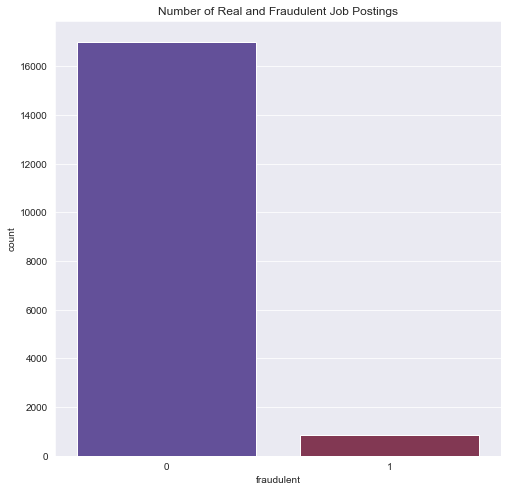

In [24]:
# Visualising number of real and fraudulent job postings
plt.figure(figsize=(8, 8))
sns.countplot(x='fraudulent', data=df, palette='twilight')
plt.title('Number of Real and Fraudulent Job Postings')
plt.show()

There is class imbalance in the dataset with a significantly larger number of real job listings than fraudulent job listings. The analysis will be continued for now and techniques to overcome this imbalance (such as random under-sampling) will be considered at a later stage.

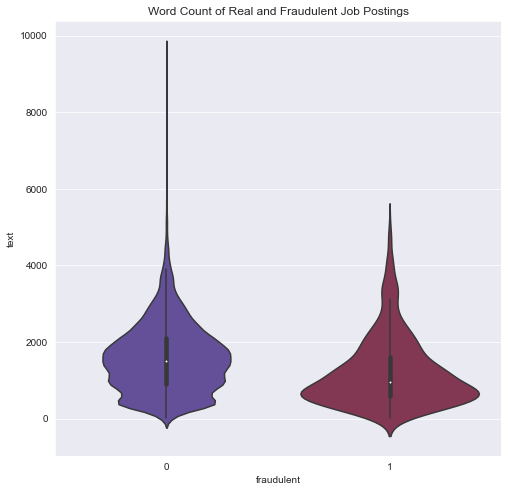

In [25]:
# Visualising word count distribution for real and fraudulent job postings
word_count = df['text'].apply(lambda x: len(x))
plt.figure(figsize=(8, 8))
sns.violinplot(x='fraudulent', y=word_count, data=df, palette='twilight')
plt.title('Word Count of Real and Fraudulent Job Postings')
plt.show()

It seems that fraudulent job listings tend to have fewer words, which makes sense.

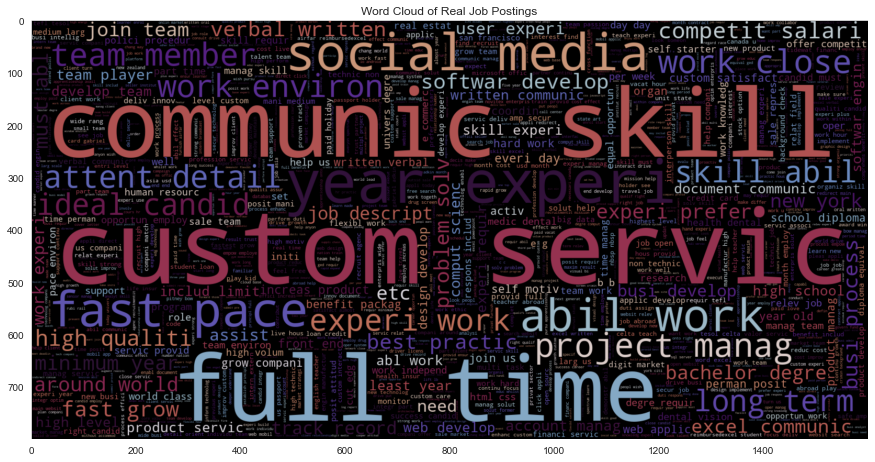

In [26]:
# Word cloud visualization of real job listings
plt.figure(figsize=(15, 15))
wc0 = WordCloud(width=1600, height=800, max_words=1000, colormap='twilight')\
      .generate(" ".join(df[df['fraudulent'] == 0].text))
plt.title('Word Cloud of Real Job Postings')
plt.grid(None)
plt.imshow(wc0, interpolation='bilinear')

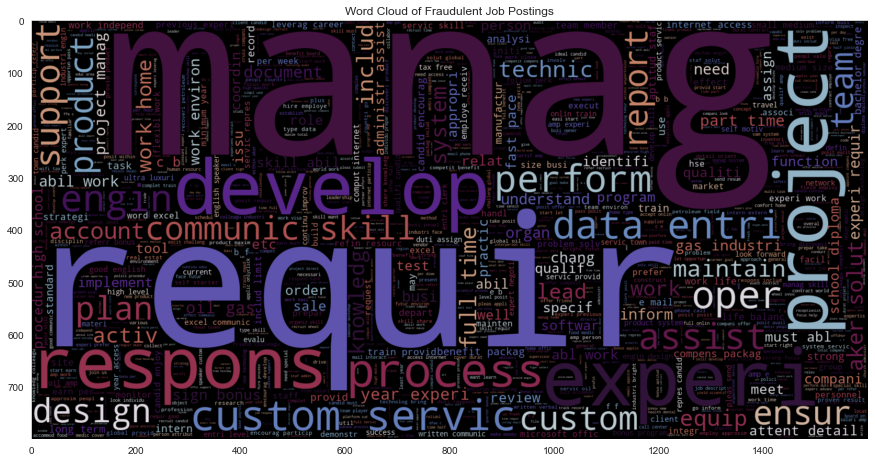

In [27]:
# Word cloud visualization of fraudulent job listings
plt.figure(figsize=(15, 15))
wc1 = WordCloud(width=1600, height=800, max_words=1000, colormap='twilight')\
      .generate(" ".join(df[df['fraudulent'] == 1].text))
plt.title('Word Cloud of Fraudulent Job Postings')
plt.grid(None)
plt.imshow(wc1, interpolation='bilinear')

The word clouds do not show any obvious differences between common words in real and fradulent job listings. For clarity, the most common unigrams, bigrams and trigrams in the listing will be counted.

In [28]:
from nltk import word_tokenize, bigrams, trigrams, FreqDist

In [29]:
# Separating text of real and fraudulent listings
real_text = df.loc[df['fraudulent'] == 0, 'text']
fraud_text =  df.loc[df['fraudulent'] == 1, 'text']

# Joining all samples into one string and tokenizing into individual words
real_tokens = word_tokenize(' '.join(real_text))
fraud_tokens = word_tokenize(' '.join(fraud_text))

In [30]:
# Creating bigrams and trigrams
real_bi = bigrams(real_tokens)
fraud_bi = bigrams(fraud_tokens)

real_tri = trigrams(real_tokens)
fraud_tri = trigrams(fraud_tokens)

In [31]:
# Counting frequency of unigrams, bigrams and trigrams
real_uni_fd = FreqDist(real_tokens)
real_bi_fd = FreqDist(real_bi)
real_tri_fd = FreqDist(real_tri)

fraud_uni_fd = FreqDist(fraud_tokens)
fraud_bi_fd = FreqDist(fraud_bi)
fraud_tri_fd = FreqDist(fraud_tri)

In [32]:
# Creating dataframe of frequencies
real_uni_df = pd.DataFrame.from_dict(real_uni_fd, orient='index', columns=['Count'])
real_bi_df = pd.DataFrame.from_dict(real_bi_fd, orient='index', columns=['Count'])
real_tri_df = pd.DataFrame.from_dict(real_tri_fd, orient='index', columns=['Count'])

fraud_uni_df = pd.DataFrame.from_dict(fraud_uni_fd, orient='index', columns=['Count'])
fraud_bi_df = pd.DataFrame.from_dict(fraud_bi_fd, orient='index', columns=['Count'])
fraud_tri_df = pd.DataFrame.from_dict(fraud_tri_fd, orient='index', columns=['Count'])

# Joining bigrams and trigrams into single string
real_bi_df.index = real_bi_df.index.map(lambda x: ' '.join(x))
real_tri_df.index = real_tri_df.index.map(lambda x: ' '.join(x))

fraud_bi_df.index = fraud_bi_df.index.map(lambda x: ' '.join(x))
fraud_tri_df.index = fraud_tri_df.index.map(lambda x: ' '.join(x))

# Sorting by count in descending order
real_uni_df = real_uni_df.sort_values('Count', ascending=False)
real_bi_df = real_bi_df.sort_values('Count', ascending=False)
real_tri_df = real_tri_df.sort_values('Count', ascending=False)

fraud_uni_df = fraud_uni_df.sort_values('Count', ascending=False)
fraud_bi_df = fraud_bi_df.sort_values('Count', ascending=False)
fraud_tri_df = fraud_tri_df.sort_values('Count', ascending=False)

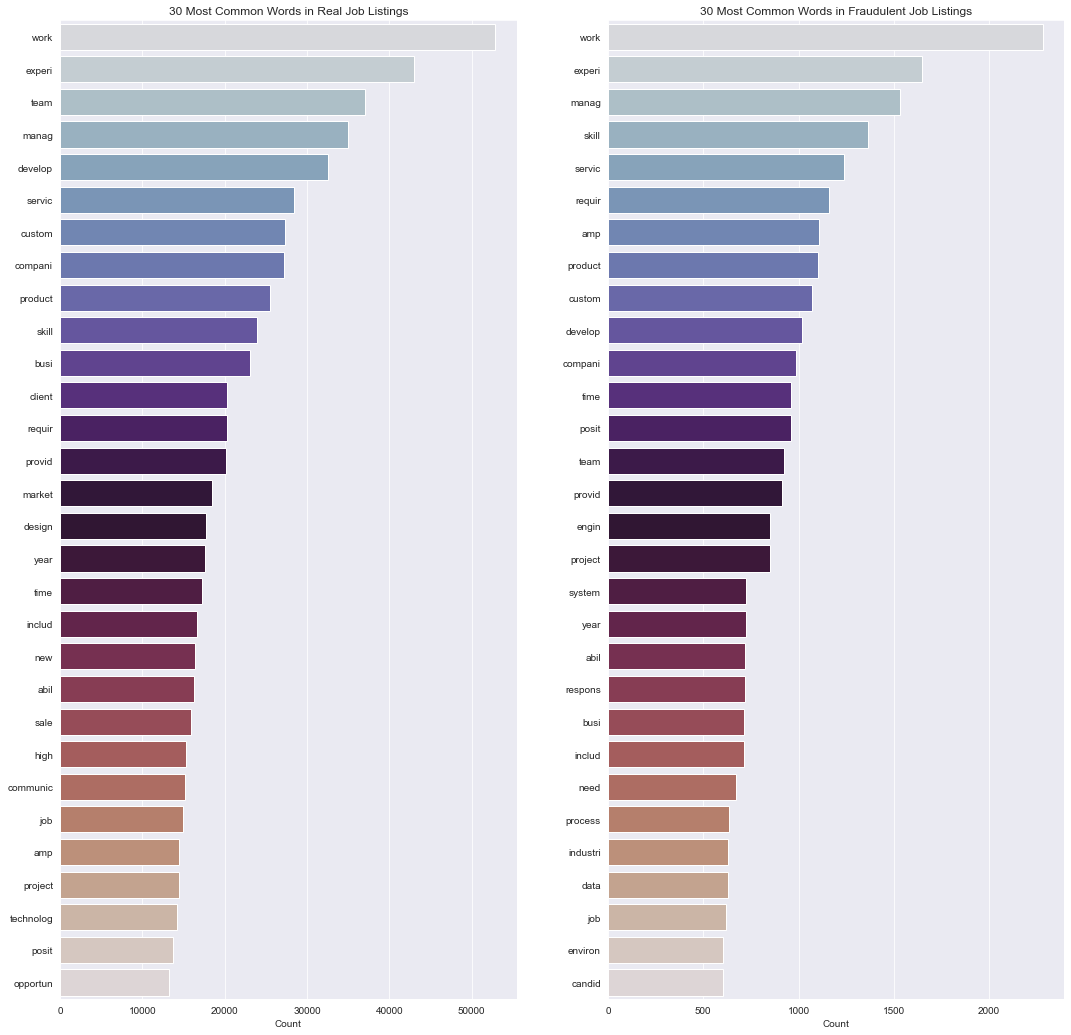

In [33]:
# Plotting unigrams
fig1, ax1 = plt.subplots(1, 2, figsize=(18, 18))

sns.barplot(x=real_uni_df.head(30)['Count'], y=real_uni_df.head(30).index, palette='twilight', ax=ax1[0])
ax1[0].title.set_text('30 Most Common Words in Real Job Listings')

sns.barplot(x=fraud_uni_df.head(30)['Count'], y=fraud_uni_df.head(30).index, palette='twilight', ax=ax1[1])
ax1[1].title.set_text('30 Most Common Words in Fraudulent Job Listings')

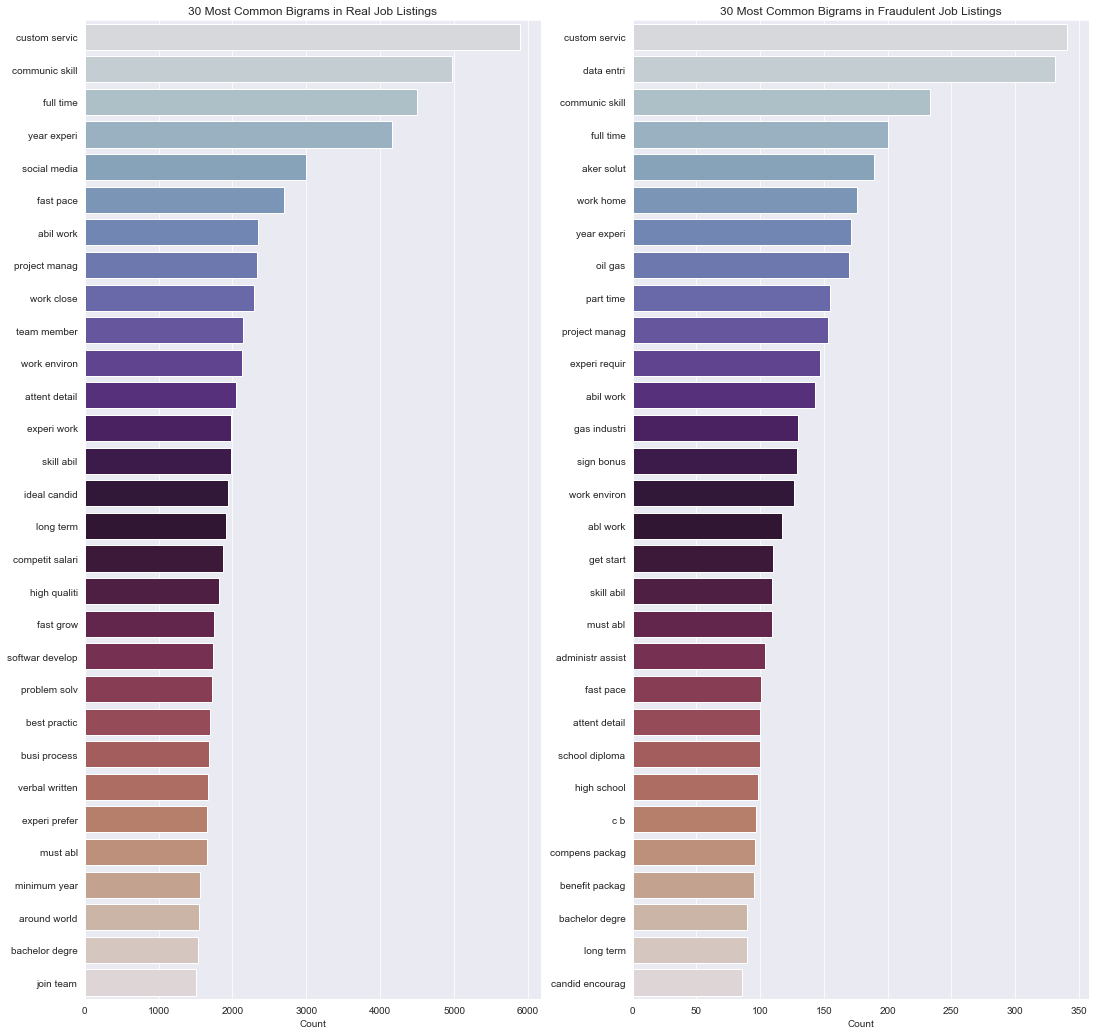

In [34]:
# Plotting bigrams
fig2, ax2 = plt.subplots(1, 2, figsize=(18, 18))

sns.barplot(x=real_bi_df.head(30)['Count'], y=real_bi_df.head(30).index, palette='twilight', ax=ax2[0])
ax2[0].title.set_text('30 Most Common Bigrams in Real Job Listings')

sns.barplot(x=fraud_bi_df.head(30)['Count'], y=fraud_bi_df.head(30).index, palette='twilight', ax=ax2[1])
ax2[1].title.set_text('30 Most Common Bigrams in Fraudulent Job Listings')

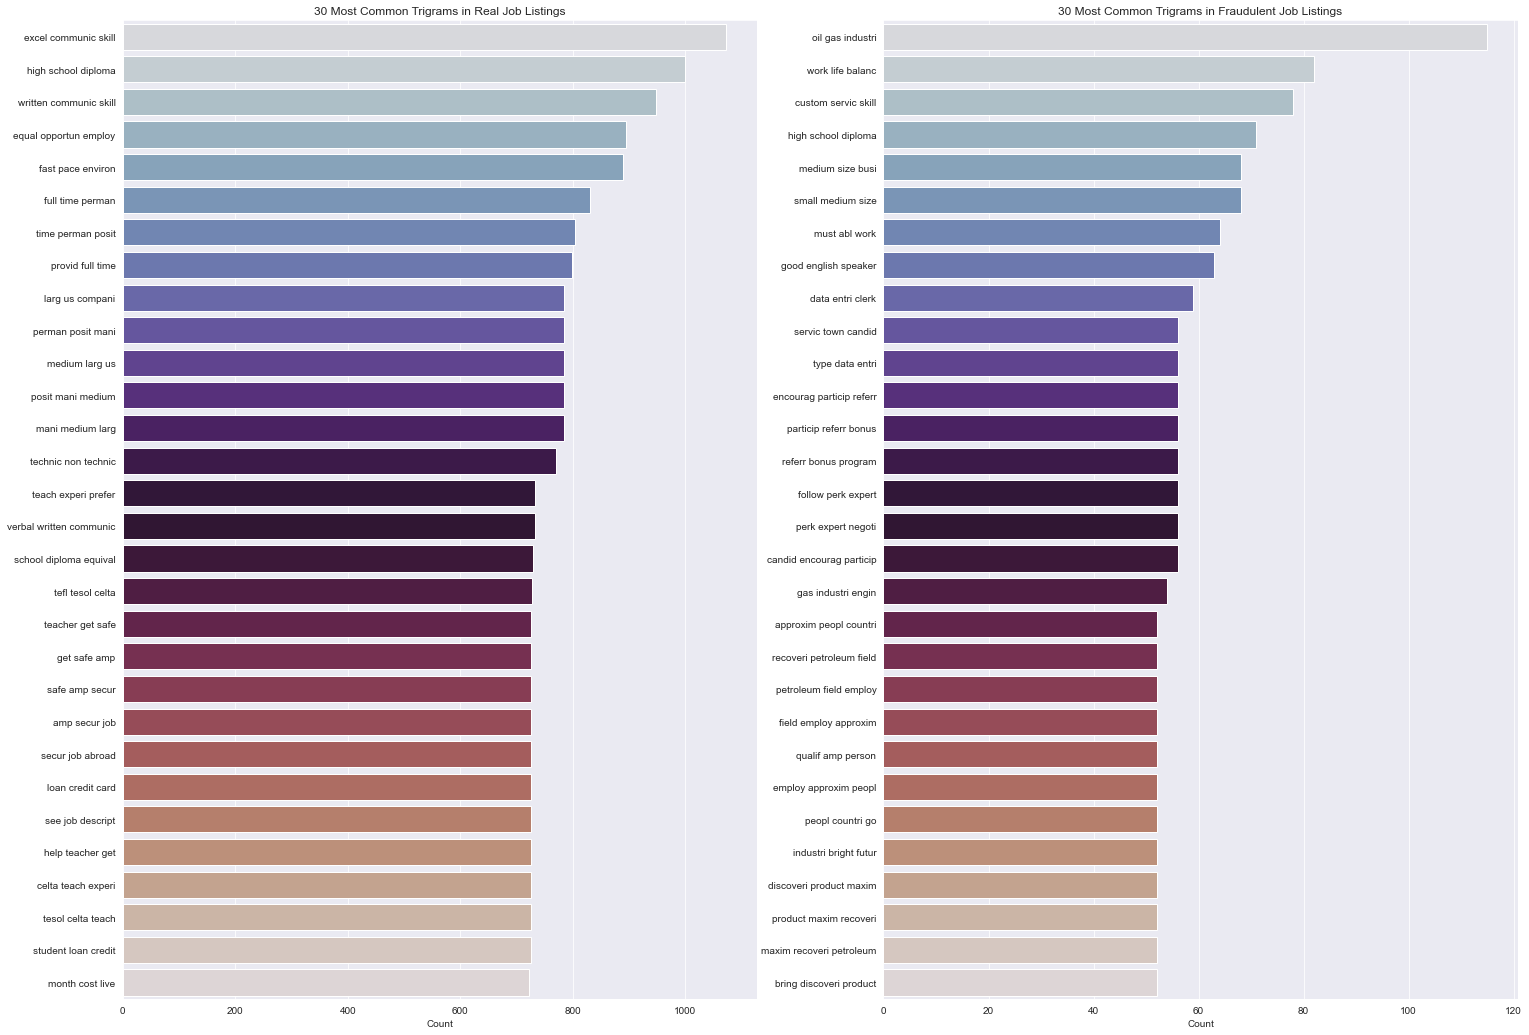

In [35]:
# Plotting trigrams
fig3, ax3 = plt.subplots(1, 2, figsize=(25, 18))

sns.barplot(x=real_tri_df.head(30)['Count'], y=real_tri_df.head(30).index, palette='twilight', ax=ax3[0])
ax3[0].title.set_text('30 Most Common Trigrams in Real Job Listings')

sns.barplot(x=fraud_tri_df.head(30)['Count'], y=fraud_tri_df.head(30).index, palette='twilight', ax=ax3[1])
ax3[1].title.set_text('30 Most Common Trigrams in Fraudulent Job Listings')

Comparing the 30 most popular words (unigrams, bigrams and trigrams) for real and fraudulent job listings has shown that they are very similar. None of the words in the fraudulent listing text stand out as being 'fraudulent' in nature.

This is expected as fraudulent listings would still contain the same work-related language as real listings to disguise themselves as being legimtimate.

## 4. Feature Engineering

The work in the following section involves preparing the data to feed into machine learning and deep learning models that will be built in later sections.

Firstly, the dataset will be split into 80% training data and 20% test data. The split will be stratified by the label to ensure that the training and test sets contain approximately the same ratio of real and fraudulent listings.

Then, the text will be vectorized so that words can be understood by algorithms.  This can be achieved by a number of methods, two of which will be used in this study:

_1. Bag-of-Words (BOW)_<br>
    Converts the text into fixed-length vectors by counting the number of times each word appears in each sample, with the length of the vector being the number of unique words in the dataset.
    <br><br>

_2. Term Frequency-Inverse Document Frequency (TF-IDF)_<br>
    Vectorizes text by calculating the term frequency multiplied by the inverse document frequency for each sample (document), where term frequency is the number of times a word appears in a document dixided by the total number of words in that document and inverse document frequency is the log of the total number of documents divided by the number of documents that contain that word.

Compared to BOW, TF-IDF is known to perform better because more important (frequently-occuring) words are given a higher ranking, whereas in BOW, all words are weighted evenly regardless of frequency.

However, both feature extraction methods will be used below to provide a comparison to understand how much of an improvement TF-IDF makes over BOW.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
X = df['text'].values
y = df['fraudulent'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14303,)
(3576,)
(14303,)
(3576,)


In [39]:
# BOW
cv = CountVectorizer(max_df=0.9, ngram_range=(1, 3))
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [40]:
# TF-IDF
tf = TfidfVectorizer(max_df=0.9, ngram_range=(1, 3))
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

In [41]:
print(X_train_cv.shape)
print(X_test_cv.shape)
print(X_train_tf.shape)
print(X_test_tf.shape)

(14303, 1980171)
(3576, 1980171)
(14303, 1980171)
(3576, 1980171)


## 5. Multinomial Naive Bayes

Multinomial Naive Bayes, one of the most popular text classification algorithms, will be used to build the first model. Naive Bayes classifiers are based on Bayes's theorem, which states:

_P(A|B) = P(B|A) * P(A) / P(B)_

where, for machine learning applications, A represents a label and B represents a feature.

In a binary problem such as this job posting classifier, the decision between real (R) and fraudulent (F) labels can be determined by computing the ratio of the posterior probabilities for each label:

_P(R|feat) / P(F|feat) = ( P(feat|R) * P(R) ) / ( P(feat|F) * P(F) )_

To compute _P(feat|R)_ and _P(feat|F)_, a generative model generates data for each label through a hypothetical random process. In naive Bayes, 'naive' assumptions are made about the generative model for each label before Bayesian classification is performed. With multinomial naive Bayes, the assumption made is that the features are assumed to be generated from a simple multinomial distribution which describes the probability of observing counts among a number of categories. Therefore, multinomial naive Bayes is most appropriate for features that represent counts, as is the case with the vectorized text in this dataset.

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Model performance will be evaluated with a 5-fold cross-validation and a range of values for alpha will be tested using a grid search.

In [43]:
cross_val = KFold(5, shuffle=True, random_state=42)

mnb = MultinomialNB()
mnb_params = {'alpha': np.arange(0, 100, 1)}

In [44]:
# BOW
mnb_grid_cv = GridSearchCV(mnb, mnb_params, cv=cross_val, n_jobs=-1)
mnb_grid_cv.fit(X_train_cv, y_train)

print(mnb_grid_cv.best_params_)
print(mnb_grid_cv.best_score_)

{'alpha': 0}
0.9844787508890969


In [45]:
# TF-IDF
mnb_grid_tf = GridSearchCV(mnb, mnb_params, cv=cross_val, n_jobs=-1)
mnb_grid_tf.fit(X_train_tf, y_train)

print(mnb_grid_tf.best_params_)
print(mnb_grid_tf.best_score_)

{'alpha': 0}
0.9853876218154444


Cross-validation scores are exceptionally high for both BOW and TF-IDF models, with the TF-IDF model achieving a marginally higher score. The models will be used to predict labels on the test set to ensure that they are not overfitting to the training set.

In [46]:
y_pred_cv = mnb_grid_cv.predict(X_test_cv)
y_pred_tf = mnb_grid_tf.predict(X_test_tf)

In [47]:
accuracy_cv = accuracy_score(y_test, y_pred_cv)
accuracy_tf = accuracy_score(y_test, y_pred_tf)

print(accuracy_cv)
print(accuracy_tf)

0.9893736017897091
0.9896532438478747


Accuracy of both models on the test set is also very high. This is most likely due to the high number of real job listings compared to the small number of fraudulent listings, therefore skewing the results.

Other performance metrics will be used to evaluate the models below:

- Precision:<br>
_tp / (tp + fp)_<br>
where tp is the number of true positives and fp is the number of false positives. Measures the ability of a classifier not to label a nagative sample as positive.<br><br>

- Recall:<br>
_tp / (tp + fn)_<br>
where tp is the number of true positives and fn is the number of false negatives. Measures the ability of a classifier to find all positive samples per class.<br><br>

- F1 Score:<br>
A weighted harmonic mean of precision and recall normalized between 0 and 1. F1 score of 1 indicates a perfect balance as precision and the recall are inversely related.

In [48]:
precision_cv = precision_score(y_test, y_pred_cv, average=None, labels=mnb_grid_cv.classes_)
recall_cv = recall_score(y_test, y_pred_cv, average=None, labels=mnb_grid_cv.classes_)
f1_cv = f1_score(y_test, y_pred_cv, average=None, labels=mnb_grid_cv.classes_)

precision_tf = precision_score(y_test, y_pred_tf, average=None, labels=mnb_grid_tf.classes_)
recall_tf = recall_score(y_test, y_pred_tf, average=None, labels=mnb_grid_tf.classes_)
f1_tf = f1_score(y_test, y_pred_tf, average=None, labels=mnb_grid_tf.classes_)

In [49]:
cv_scores = pd.DataFrame({
    'Precision': precision_cv,
    'Recall': recall_cv,
    'F1': f1_cv
})

tf_scores = pd.DataFrame({
    'Precision': precision_tf,
    'Recall': recall_tf,
    'F1': f1_tf
})

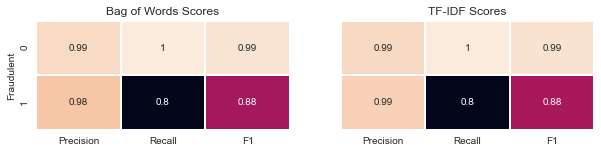

In [50]:
fig, ax = plt.subplots(1, 2)
fig.set_figheight(2)
fig.set_figwidth(10)
sns.heatmap(cv_scores, linewidths=0.05, annot=True, cbar=False, ax=ax[0])
sns.heatmap(tf_scores, linewidths=0.05, annot=True, cbar=False, yticklabels=False, ax=ax[1])
ax[0].title.set_text('Bag of Words Scores')
ax[1].title.set_text('TF-IDF Scores')
ax[0].set_ylabel('Fraudulent')
fig.show()

Classification accuracy can be further evaluated with a confusion matrix which displays the percentage of correct and incorrect predictions by class.

In [51]:
cm_cv = confusion_matrix(y_test, y_pred_cv,
                         normalize='true',
                         labels=mnb_grid_cv.classes_)
disp_cv = ConfusionMatrixDisplay(cm_cv, display_labels=mnb_grid_cv.classes_)

cm_tf = confusion_matrix(y_test, y_pred_tf,
                         normalize='true',
                         labels=mnb_grid_tf.classes_)
disp_tf = ConfusionMatrixDisplay(cm_tf, display_labels=mnb_grid_tf.classes_)

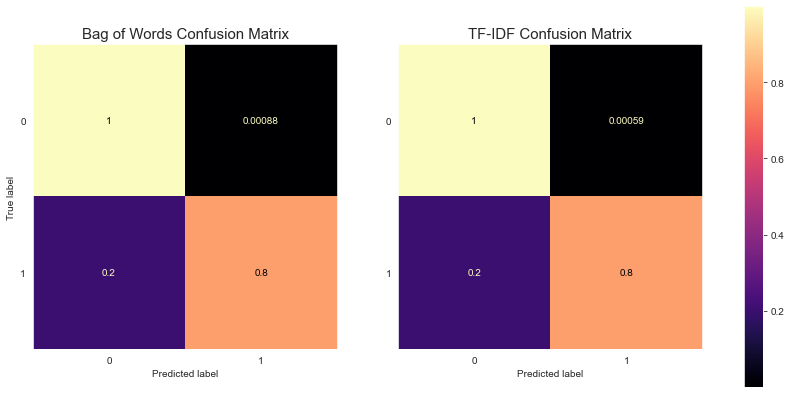

In [52]:
fig3, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 7))

disp_cv.plot(ax=ax4, cmap='magma')
disp_cv.ax_.set_title('Bag of Words Confusion Matrix', fontdict={'fontsize': 15})
disp_cv.im_.colorbar.remove()
ax4.grid(False)

disp_tf.plot(ax=ax5, cmap='magma')
disp_tf.ax_.set_title('TF-IDF Confusion Matrix', fontdict={'fontsize': 15})
disp_tf.im_.colorbar.remove()
disp_tf.ax_.set_ylabel('')
ax5.grid(False)

fig1.colorbar(disp_tf.im_, ax=(ax4, ax5))

plt.show()

The confusion matrices show that close to 100% of the real job listings are correctly being classified as real, whereas only 80% of the fraudulent listings are being classified as fraudulent.

Overall, the results have shown that there is not much difference between using bag-of-words and TF-IDF vectorization in this project.

## 6. Long Short-Term Memory

In the following section, deep learning will be implemented to classify the job postings. More specifically, Long Short-Term Memory (LSTM), a type of recurrent neural network, will be used and the results can be compared with the multinomial naive bayes model.

Recurrent neural networks (RNN) outperform traditional neural networks in text classification because they take into account the context of words through feedback loops providing information between stages of the network to inform the final output. However, as the gap between relevant information and the point where it is needed (i.e. distance between linked words) grows, RNNs become unable to learn to connect the information.

LSTMs were specifically designed to overcome this problem and are capable of learning long-term dependencies. Compared with standard RNNs, LSTMs also have a chain-like structure with repeating modules of neural network but have a more complex structure within each module containing layers that interact in special ways.

LSTMs contain a cell state that runs down the entire chain, allowing information to be carried through it. Information can be removed or added to the cell state via gates in four layers listed below:

_1. Forget Gate Layer_<br>
A sigmoid layer that decides what information to remove.

_2. Input Gate Layer_<br>
A sigmoid layer that decides which values to change/ update.

_3. Tanh Layer_<br>
Decides which new candidate values can be added to the state. At this stage, the old cell state is replaced by the new cell state.

_4. Output Layer_<br>
A sigmoid gate decides which parts of the cell state to output, then the cell state is put through tanh and multiplied by the output of the sigmoid gate to produce the desired output.

The LSTM structure is effectively visualized and explained in [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) by Christopher Olah.

In [53]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten, Dropout, Activation

In [54]:
# Tokenizing 9999 most common words
num_words=10000

tokenizer = Tokenizer(num_words=num_words, split=' ')
tokenizer.fit_on_texts(X_train)

X_train_tokenized = tokenizer.texts_to_sequences(X_train)
X_test_tokenized = tokenizer.texts_to_sequences(X_test)

In [55]:
# Making all sequences 1000 numbers in length
maxlen = 1000

X_train_pad = pad_sequences(X_train_tokenized, maxlen=maxlen, padding='pre')
X_test_pad = pad_sequences(X_test_tokenized, maxlen=maxlen, padding='pre')

In [56]:
print(X_train_pad.shape)
print(X_test_pad.shape)

(14303, 1000)
(3576, 1000)


In [57]:
# Looking at one sample
X_train_pad[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

Below are the construction details of the LSTM network and its layers. The architecture has been designed largely through trail and error using arbitrary numbers of neurons in each layer. The arrangement below has been shown to perform well, producing high scores.

In [58]:
# Creating LSTM network
model = Sequential()

model.add(Embedding(num_words, 50, input_length=maxlen))
model.add(LSTM(64, return_sequences=True))
model.add(Dense(256))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 50)          500000    
                                                                 
 lstm (LSTM)                 (None, 1000, 64)          29440     
                                                                 
 dense (Dense)               (None, 1000, 256)         16640     
                                                                 
 flatten (Flatten)           (None, 256000)            0         
                                                                 
 activation (Activation)     (None, 256000)            0         
                                                                 
 dropout (Dropout)           (None, 256000)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

In [59]:
# Fitting to training set
model.fit(X_train_pad, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

Epoch 1/10
90/90 [==============================] - 150s 2s/step - loss: 0.1614 - accuracy: 0.9514 - val_loss: 0.1002 - val_accuracy: 0.9588
Epoch 2/10
90/90 [==============================] - 191s 2s/step - loss: 0.0597 - accuracy: 0.9784 - val_loss: 0.0855 - val_accuracy: 0.9797
Epoch 3/10
90/90 [==============================] - 199s 2s/step - loss: 0.0210 - accuracy: 0.9928 - val_loss: 0.1369 - val_accuracy: 0.9818
Epoch 4/10
90/90 [==============================] - 204s 2s/step - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.1991 - val_accuracy: 0.9801
Epoch 5/10
90/90 [==============================] - 206s 2s/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.1293 - val_accuracy: 0.9766
Epoch 6/10
90/90 [==============================] - 208s 2s/step - loss: 0.0045 - accuracy: 0.9984 - val_loss: 0.4068 - val_accuracy: 0.9829
Epoch 7/10
90/90 [==============================] - 209s 2s/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.2790 - val_accuracy: 0.9808
Epoch 8/10
90

In [60]:
evaluation = model.evaluate(X_test_pad, y_test)

112/112 [==============================] - 11s 98ms/step - loss: 0.1498 - accuracy: 0.9821


The LSTM network was also able to achieve a very high score of __0.982__ on the test set. Again, this is likely to be unrealistically high due to the discrepancy between number of real samples and fraudulent samples, but this is still a good starting point at this stage and the model can be tweaked further in future work once the imbalance has been addressed.

In [75]:
pred_lstm = model.predict(X_test_pad, verbose=1)

112/112 [==============================] - 19s 171ms/step


In [93]:
# Converting predicted probabilities to 0 or 1 labels
y_pred_lstm = np.array([1 if i > 0.5 else 0 for i in pred_lstm])

In [95]:
# Checking that the array consists of labels 0 and 1
np.unique(y_pred_lstm, return_counts=True)

(array([0, 1]), array([3411,  165], dtype=int64))

In [96]:
precision_lstm = precision_score(y_test, y_pred_lstm, average=None, labels=mnb_grid_cv.classes_)
recall_lstm = recall_score(y_test, y_pred_lstm, average=None, labels=mnb_grid_cv.classes_)
f1_lstm = f1_score(y_test, y_pred_lstm, average=None, labels=mnb_grid_cv.classes_)

lstm_scores = pd.DataFrame({
    'Precision': precision_lstm,
    'Recall': recall_lstm,
    'F1': f1_lstm
})

As with the multinomial naive bayes model, the LSTM model will be evaluated with precision, recall, F1 scores and a confusion matrix.

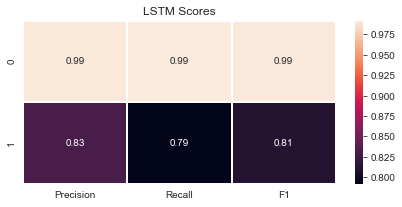

In [97]:
plt.figure(figsize=(7, 3))
sns.heatmap(lstm_scores, linewidths=0.05, annot=True)
plt.title('LSTM Scores')
plt.show()

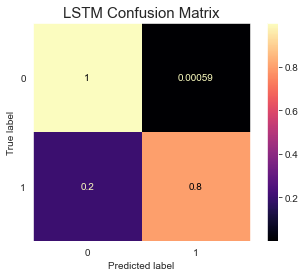

In [98]:
cm_lstm = confusion_matrix(y_test, y_pred_lstm,
                         normalize='true',
                         labels=mnb_grid_tf.classes_)
disp_lstm = ConfusionMatrixDisplay(cm_lstm, display_labels=mnb_grid_tf.classes_)

disp_tf.plot(cmap='magma')
plt.title('LSTM Confusion Matrix', fontdict={'fontsize': 15})
plt.grid(None)
plt.show()

Similarly to the multinomial naive bayes model, LSTM was better at classifying the real samples as real than classifying fraudulent samples as fraudulent.

## 7. Conclusion

In this notebook, models were built to classify job listings as real or fraudulent based on the text content of the listing. It was found that both multinomial naive bayes and LSTM performed exceptionally well, achieving scores greater than  __0.98__. However, exploratory data analysis has shown that the high scores are likely due to the class imbalance, with a much higher number of real samples than fraudulent samples. Nevertheless, the model provides a good starting point from which improvements can be made in future work.

#### Future Work

- Address class imbalance by obtaining more samples or over-sampling fraudulent listings with [imbalanced-learn RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)
- Try other vectorization techniques (e.g. Word2Vec)
- Try BERT (Bidirectional Encoder Representations from Transformers)